In [1]:
'''
7 gen W Donato Marc Luca Ferro Scalzo
7 gen W Donato Bond Luca Ferro Scalzo
7 gen L Bond Scalzo Ferro Luca Marc
8 gen L Donato Kate Ferro Luca Marc
8 gen W Kate Marc Ferro Luca Donato
8 gen W Ferro Luca Marc Kate Donato
10 gen L Vitto Scalzo Luca Donato Kate
10 gen W Luca Donato Kate Vitto Scalzo
10 gen W Vitto Donato Kate Luca Scalzo
10 gen W Scalzo Kate Vitto Donato Luca
10 gen L Kate Luca Scalzo Vitto Donato
13 gen W Luca Scalzo Marc Massi Vitto
13 gen L Bond Vitto Marc Massi Scalzo
13 gen Lm Scalzo Bond Vitto Luca Massi
13 gen W Marc Vitto Scalzo Bond Massi
15 gen L Bond Ferro Vitto Donato Marc
15 gen W Marc Vitto Ferro Donato Bond
15 gen L Vitto Ferro Donato Marc Bond
17 gen W Donato Kate Ferro Vitto Scalzo
17 gen L Kate Vitto Marc Ferro Scalzo
17 gen L Ferro Vitto Marc Donato Kate
20 gen W Vitto Scalzo Marc Bond Luca
21 gen W Luca Donato Marc Ferro Kate
21 gen L Ferro Donato Marc Luca Kate
22 gen L Kate Luca Donato Bond Scalzo
22 gen W Donato Luca Marc Vitto Kate
22 gen W Bond Kate Marc Luca Scalzo
22 gen W Kate Marc Donato Luca Bond
23 gen W Donato Scalzo Ferro Marc Vitto
23 gen W Scalzo Marc Donato Ferro Vitto
24 gen L Luca Massi Marc Kate Ric
24 gen W Luca Massi Marc Kate Ric
24 gen L Donato Luca Marc Vitto Bond
24 gen L Luca Ferro Marc Vitto Bond
27 gen W Massi Scalzo Luca Vitto Mike
27 gen W Vitto Luca Marc Bond Mike
28 gen L Luca Kate Marc Donato Scalzo
28 gen W Marc Donato Luca Kate Scalzo
28 gen L Kate Bond Scalzo Donato Luca
28 gen L Ale Kate Massi Luca Marc
29 gen W Marc Vitto Luca Ferro Scalzo
29 gen W Bond Luca Ferro Vitto Scalzo
29 gen W Marc Luca Donato Vitto Bond
30 gen W Kate Marc Donato Vitto Ferro
30 gen L Ferro Vitto Donato Marc Kate
31 gen W Luca Marc Vitto Ferro Massi
31 gen W Vitto Ferro Luca Donato Massi
31 gen L Donato Massi Ferro Luca Vitto
3 feb W Kate Donato Marc Massi Impe
3 feb W Impe Marc Luca Massi Kate
3 feb W Donato Massi Impe Luca Kate
3 feb W Impe Massi Marc Luca Kate
3 feb W Luca Donato Impe Marc Massi
3 feb L Marc Donato Luca Massi Impe
4 feb L Luca Donato Marc Ferro Kate
4 feb W Donato Kate Luca Marc Ferro
4 feb W Ferro Donato Luca Marc Kate
5 feb L Scalzo Luca Donato Ferro Vitto
5 feb W Donato Vitto Marc Ferro Kate
5 feb L Marc Ferro Vitto Kate Luca
5 feb W Luca Ferro Donato Kate Scalzo
5 feb L Donato Vitto Marc Ferro Scalzo
7 feb W Kate Luca Marc Ferro Donato
7 feb W Vitto Donato Ferro Kate Massi
7 feb W Kate Massi Marc Ferro Vitto
7 feb W Ferro Massi Marc Luca Donato
10 feb W Scalzo Luca Vitto Massi Impe
10 feb W Massi Bond Marc Vitto Impe
10 feb W Scalzo Bond Massi Marc Impe
11 feb W Donato Bond Marc Luca Ferro
11 feb W Ferro Luca Marc Donato Bond
11 feb W Bond Luca Ferro Massi Donato
12 feb L Scalzo Vitto Marc Luca Donato
12 feb L Donato Ferro Marc Vitto Scalzo
12 feb L Vitto Scalzo Luca Ferro Donato
12 feb W Luca Marc Donato Ferro Vitto
13 feb W Vitto Kate Marc Donato Ferro
13 feb L Kate Donato Marc Ferro Vitto
13 feb L Vitto Ferro Marc Donato Kate
14 feb L Donato Bond Marc Luca Ferro
14 feb W Bond Ferro Marc Luca Vitto
14 feb L Vitto Bond Marc Donato Ferro
14 feb W Ferro Luca Bond Donato Vitto
17 feb L Luca Vitto Donato Scalzo Massi
17 feb L Luca Marc Donato Vitto Massi
17 feb L Ale Marc Donato Vitto Scalzo
17 feb W Ale Marc Luca Donato Massi
19 feb L Kate Scalzo Luca Ferro Bond
19 feb W Marc Ferro Kate Bond Scalzo
19 feb L Bond Kate Marc Luca Ferro
19 feb W Kate Ferro Scalzo Luca Bond
20 feb L Donato Ferro Marc Vitto Scalzo
20 feb W Ferro Vitto Marc Donato Scalzo
20 feb L Donato Ferro Marc Scalzo Bond
20 feb W Vitto Bond Donato Ferro Scalzo
20 feb L Donato Bond Marc Vitto Scalzo
24 feb L Bond Kate Marc Luca Vitto
24 feb W Luca Kate Marc Vitto Bond
24 feb W Marc Bond Luca Vitto Kate
24 feb W Kate Luca Marc Vitto Bond
25 feb Wv Donato Vitto Marc Luca Bond
25 feb W Marc Bond Luca Ferro Scalzo
25 feb W Vitto Bond Luca Ferro Scalzo
25 feb W Bond Donato Marc Ferro Scalzo
26 feb L Luca Marc Donato Vitto Scalzo
26 feb W Bond Donato Marc Luca Scalzo
26 feb W Bond Vitto Luca Donato Scalzo
26 feb W Donato Bond Marc Luca Vitto
'''

'\n7 gen W Donato Marc Luca Ferro Scalzo\n7 gen W Donato Bond Luca Ferro Scalzo\n7 gen L Bond Scalzo Ferro Luca Marc\n8 gen L Donato Kate Ferro Luca Marc\n8 gen W Kate Marc Ferro Luca Donato\n8 gen W Ferro Luca Marc Kate Donato\n10 gen L Vitto Scalzo Luca Donato Kate\n10 gen W Luca Donato Kate Vitto Scalzo\n10 gen W Vitto Donato Kate Luca Scalzo\n10 gen W Scalzo Kate Vitto Donato Luca\n10 gen L Kate Luca Scalzo Vitto Donato\n13 gen W Luca Scalzo Marc Massi Vitto\n13 gen L Bond Vitto Marc Massi Scalzo\n13 gen Lm Scalzo Bond Vitto Luca Massi\n13 gen W Marc Vitto Scalzo Bond Massi\n15 gen L Bond Ferro Vitto Donato Marc\n15 gen W Marc Vitto Ferro Donato Bond\n15 gen L Vitto Ferro Donato Marc Bond\n17 gen W Donato Kate Ferro Vitto Scalzo\n17 gen L Kate Vitto Marc Ferro Scalzo\n17 gen L Ferro Vitto Marc Donato Kate\n20 gen W Vitto Scalzo Marc Bond Luca\n21 gen W Luca Donato Marc Ferro Kate\n21 gen L Ferro Donato Marc Luca Kate\n22 gen L Kate Luca Donato Bond Scalzo\n22 gen W Donato Luca Marc

In [10]:
from datetime import datetime
def parse_partite(raw_data) -> list:
    partite = []
    for riga in raw_data.strip().split("\n"):
        elementi = riga.split()
        data = f"{elementi[0]} {elementi[1]}"  # Combina giorno e mese
        risultato = elementi[2]  # Risultato (W, L, Wm, Lm)
        giocatori = elementi[3:]  # Lista di giocatori
        partite.append((data, risultato, giocatori))
    return partite

def conta_presenze(partite):
    presenze = {} # = {'p1': 35, 'p2': 29,...}
    elenco_giocatori_ordine_alfabetico = list()
    for partita in partite:
        giocatori = partita[2]
        for giocatore in giocatori:
            if giocatore not in elenco_giocatori_ordine_alfabetico:
                elenco_giocatori_ordine_alfabetico.append(giocatore)
                elenco_giocatori_ordine_alfabetico.sort()
    for giocatore in elenco_giocatori_ordine_alfabetico:
        presenze[giocatore] = 0
        for partita in partite:
            giocatori = partita[2]
            if giocatore in giocatori:
                presenze[giocatore] += 1
    presenze = dict(sorted(presenze.items(), key=lambda item: item[1], reverse=True))
    return elenco_giocatori_ordine_alfabetico, presenze

def calcola_classifica(partite):
    # Dizionario per i punteggi dei giocatori
    punteggi = {}

    # Calcolo dei punteggi
    for data, risultato, giocatori in partite:
        if risultato == "W":
            punteggi[giocatori[0]] = punteggi.get(giocatori[0], 0) + 2  # p1
            punteggi[giocatori[1]] = punteggi.get(giocatori[1], 0) + 1  # p2
            for p in giocatori[2:]:  # p3, p4, p5
                punteggi[p] = punteggi.get(p, 0) - 1
        elif risultato == "L":
            punteggi[giocatori[0]] = punteggi.get(giocatori[0], 0) - 2  # p1
            punteggi[giocatori[1]] = punteggi.get(giocatori[1], 0) - 1  # p2
            for p in giocatori[2:]:  # p3, p4, p5
                punteggi[p] = punteggi.get(p, 0) + 1
        elif risultato == "Wm":
            punteggi[giocatori[0]] = punteggi.get(giocatori[0], 0) + 4 # p1
            for p in giocatori[1:]:  # p2, p3, p4, p5
                punteggi[p] = punteggi.get(p, 0) - 1
        elif risultato == "Lm":
            punteggi[giocatori[0]] = punteggi.get(giocatori[0], 0) - 4 # p1
            for p in giocatori[1:]: # p2, p3, p4, p5
                punteggi[p] = punteggi.get(p, 0) + 1
        elif risultato == "Wv":
            punteggi[giocatori[0]] = punteggi.get(giocatori[0], 0) + 4  # p1
            punteggi[giocatori[1]] = punteggi.get(giocatori[1], 0) + 2  # p2
            for p in giocatori[2:]:  # p3, p4, p5
                punteggi[p] = punteggi.get(p, 0) - 2
        elif risultato == "Lv":
            punteggi[giocatori[0]] = punteggi.get(giocatori[0], 0) - 4  # p1
            punteggi[giocatori[1]] = punteggi.get(giocatori[1], 0) - 2  # p2
            for p in giocatori[2:]:  # p3, p4, p5
                punteggi[p] = punteggi.get(p, 0) + 2
        else:
            print(f"Errore risultato non riconosciuto: {risultato}")
            #break

    # Ordinamento della classifica
    classifica = sorted(punteggi.items(), key=lambda x: x[1], reverse=True)
    return punteggi, classifica

def conta_punti_a_partita(punteggi, presenze):
    punti_a_partita = {}  # {'Donato': 0,26, 'Marc': 0,25, 'Luca': 0,19
    for giocatore in punteggi:
        punti_ = punteggi[giocatore]
        partite_giocate_ = presenze[giocatore]
        #print(punti_, "\t", partite_giocate_)
        punti_a_partita[giocatore] = round(punti_/partite_giocate_, 3)
        punti_a_partita = dict(sorted(punti_a_partita.items(), key=lambda item: item[1], reverse=True))
    return punti_a_partita

def calcola_time():
    today = datetime.today().strftime('%d/%m')
    hourUTC = datetime.now().strftime('%H')
    hourIT = int(hourUTC) + 1
    min = datetime.now().strftime('%M')
    now = f"{hourIT}:{min}"
    return today, now

# - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - #
# Run
raw_data_ = [_][0]
# Parsing delle partite
partite = parse_partite(raw_data_)
#print(partite[5])  #('8 gen', 'W', ['Ferro', 'Luca', 'Marc', 'Kate', 'Donato'])
                    # str, char, list
                    # data, risultato, giocatori
# Calcolo della classifica
punteggi, classifica = calcola_classifica(partite)
#print(punteggi)          # {'Donato': 8, 'Marc': 11, 'Luca': 0, 'Ferro': -10,
#print(list(classifica))  # [('Marc', 11), ('Donato', 8), ('Luca
#print(classifica)        # [('Marc', 11), ('Donato', 8), ('Luca
#print(partite[9][2])     # ['Scalzo', 'Kate', 'Vitto', 'Donato', 'Luca']
                          # quindi giocatori_di_una_partita è partite[][2]
today, now = calcola_time()
print(f"Classifica 2025 aggiornata al {today}, {now} ({len(partite)} partite):")
for giocatore, punteggio in classifica:
    print(f"{punteggio}\t{giocatore}")
# Calcolo presenze per giocatore
elenco_giocatori_ordine_alfabetico, presenze = conta_presenze(partite)
#print(elenco_giocatori_ordine_alfabetico)
print("\nPresenze:")
presenze = list(presenze.items()) # Perché presenze era un dict e adesso mi serve una list
for giocatore, presenze_giocatore in presenze:
    print(f"{giocatore}:\t{ presenze_giocatore} ({round(100*presenze_giocatore/(len(partite)),1)}%)")

print("\nPunti a partita:")
presenze = dict(presenze) # Perché presenze era una list
punti_a_partita = conta_punti_a_partita(punteggi, presenze)
for giocatore, punti in punti_a_partita.items():
    print(f"{giocatore}:\t{punti}")

Classifica 2025 aggiornata al 26/02, 14:13 (108 partite):
13	Marc
9	Donato
2	Bond
1	Vitto
1	Massi
0	Ric
-1	Impe
-2	Mike
-2	Ale
-3	Luca
-3	Kate
-6	Scalzo
-9	Ferro

Presenze:
Marc:	80 (74.1%)
Luca:	76 (70.4%)
Donato:	73 (67.6%)
Vitto:	65 (60.2%)
Ferro:	60 (55.6%)
Kate:	49 (45.4%)
Scalzo:	49 (45.4%)
Bond:	45 (41.7%)
Massi:	27 (25.0%)
Impe:	9 (8.3%)
Ale:	3 (2.8%)
Mike:	2 (1.9%)
Ric:	2 (1.9%)

Punti a partita:
Marc:	0.163
Donato:	0.123
Bond:	0.044
Massi:	0.037
Vitto:	0.015
Ric:	0.0
Luca:	-0.039
Kate:	-0.061
Impe:	-0.111
Scalzo:	-0.122
Ferro:	-0.15
Ale:	-0.667
Mike:	-1.0


In [3]:
def calcola_punteggio_partita(giocatore, partita):
  # Calcolo del punteggio di un giocatore in ogni singola partita
  giocatori = partita[2]
  if giocatore not in giocatori:
    return 0  # Se il giocatore non ha giocato scrive 0
  elif giocatore in giocatori:
    if partita[1] == "W":
      if giocatore == giocatori[0]:     # Se il giocatore è il giaguaro
        return 2
      elif giocatore == giocatori[1]:   # Se il giocatore è l'amico
        return 1
      elif giocatore in giocatori[2:]:
        return -1
    elif partita[1] == "L":
      if giocatore == giocatori[0]:
        return -2
      elif giocatore == giocatori[1]:
        return -1
      elif giocatore in giocatori[2:]:
        return 1
    elif partita[1] == "Wm":
      if giocatore == giocatori[0]:
        return 4
      elif giocatore in giocatori[1:]:
        return -1
    elif partita[1] == "Lm":
      if giocatore == giocatori[0]:
        return -4
      elif giocatore in giocatori[1:]:
        return 1
    elif partita[1] == "Wv":
      if giocatore == giocatori[0]:
        return 4
      elif giocatore == giocatori[1]:
        return 2
      elif giocatore in giocatori[2:]:
        return -2
    elif partita[1] == "Lv":
      if giocatore == giocatori[0]:
        return -4
      elif giocatore == giocatori[1]:
        return -2
      elif giocatore in giocatori[2:]:
        return 2
    else:
      print(f"Errore risultato non riconosciuto: {partita[1]}")
      #break()
      return -1000

def calcola_timeseries(elenco_giocatori_ordine_alfabetico, partite) -> dict:
  timeseries = {}
  for giocatore in elenco_giocatori_ordine_alfabetico:
    risultati_giocatore = []
    for partita in partite:
      risultati_giocatore.append(calcola_punteggio_partita(giocatore, partita))
    timeseries[giocatore] = risultati_giocatore
  return timeseries

print('Punteggi dalla 100esima partita in poi:')
for giocatore in elenco_giocatori_ordine_alfabetico:
  punteggio = 0
  for partita in partite[100:]:
    punteggio += calcola_punteggio_partita(giocatore, partita)
  print(f"{giocatore}:\t{punteggio}")

print('Prime 5 partite:')
print(elenco_giocatori_ordine_alfabetico)
for partita in partite[:5]:
  lista_risultati = []
  for giocatore in elenco_giocatori_ordine_alfabetico:
    lista_risultati.append(calcola_punteggio_partita(giocatore, partita))
  print(lista_risultati)

print('')
timeseries = dict(calcola_timeseries(elenco_giocatori_ordine_alfabetico,partite))
for giocatore in timeseries:
   print(f"{giocatore}:\t{timeseries[giocatore]}")

Punteggi dalla 100esima partita in poi:
Ale:	0
Bond:	7
Donato:	8
Ferro:	-3
Impe:	0
Kate:	0
Luca:	-9
Marc:	-4
Massi:	0
Mike:	0
Ric:	0
Scalzo:	-4
Vitto:	5
Prime 5 partite:
['Ale', 'Bond', 'Donato', 'Ferro', 'Impe', 'Kate', 'Luca', 'Marc', 'Massi', 'Mike', 'Ric', 'Scalzo', 'Vitto']
[0, 0, 2, -1, 0, 0, -1, 1, 0, 0, 0, -1, 0]
[0, 1, 2, -1, 0, 0, -1, 0, 0, 0, 0, -1, 0]
[0, -2, 0, 1, 0, 0, 1, 1, 0, 0, 0, -1, 0]
[0, 0, -2, 1, 0, -1, 1, 1, 0, 0, 0, 0, 0]
[0, 0, -1, -1, 0, 2, -1, 1, 0, 0, 0, 0, 0]

Ale:	[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
Bond:	[0, 1, -2, 0, 0, 0, 0, 0, 0, 0, 0, 0, -2, 1, -1, -2, -1, 1, 0, 0, 0, -1, 0, 0, 1, 0, 2, -1, 0, 0, 0, 0, 1, 1, 0, -1, 0, 0, -1, 0, 0, 2, -1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0

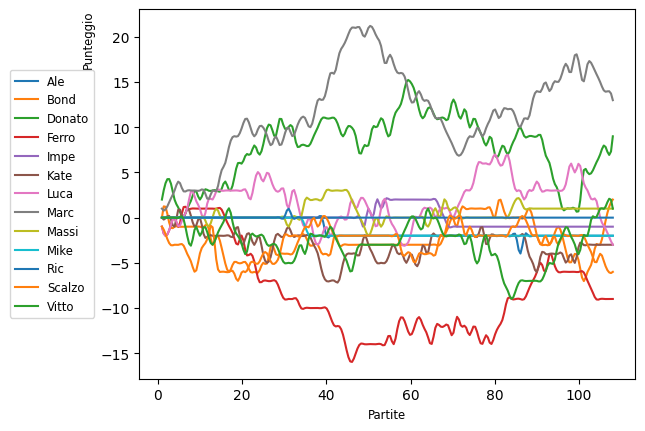

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import make_interp_spline, BSpline

def calcola_incremento_punteggi(elenco_giocatori_ordine_alfabetico, partite) -> dict():
  incremento_punteggi = {}
  for giocatore in elenco_giocatori_ordine_alfabetico:
    incremento_punteggi[giocatore] = []
    count = 0
    for partita in partite:
       count += calcola_punteggio_partita(giocatore, partita)
       incremento_punteggi[giocatore].append(count)
  return incremento_punteggi
#incremento_punteggi = dict(calcola_incremento_punteggi(elenco_giocatori_ordine_alfabetico,partite[:5]))
#print(incremento_punteggi)

def disegna(giocatore, partite):
  #matches = (np.arange(1, len(partite)+1)).tolist()
  #points = np.array(incremento_punteggi[giocatore])
  #Plot Smooth Curve Using the scipy.interpolate.make_interp_spline() Class
  x = (np.arange(1, len(partite)+1)).tolist()
  y = np.array(incremento_punteggi[giocatore])
  X_Y_Spline = make_interp_spline(x, y)
  X_ = np.linspace(x[0], x[len(x)-1], 250)
  Y_ = X_Y_Spline(X_)
  plt.xlabel('Partite', fontsize='small')
  plt.ylabel('Punteggio', loc='top', fontsize='small')
  #plt.plot(matches, points, linestyle='-')
  plt.plot(X_, Y_)

def disegna_multi(giocatori, partite):
  for giocatore in giocatori:
    disegna(giocatore, partite)
  plt.legend(giocatori, loc='center right', bbox_to_anchor=(-0.08, 0.5), fontsize='small')

incremento_punteggi = dict(calcola_incremento_punteggi(elenco_giocatori_ordine_alfabetico,partite))
tutti = elenco_giocatori_ordine_alfabetico
#team2024 = ['Donato', 'Luca', 'Marc', 'Ferro', 'Vitto']
#teamexport = ['Bond', 'Scalzo', 'Vitto']
disegna_multi(tutti, partite)
#plt.show()

In [5]:
def calcola_punteggio_partita_con_assenze(giocatore, partita) -> str:
  # Calcolo del punteggio di un giocatore in ogni singola partita
  giocatori = partita[2]
  if giocatore not in giocatori:
    return 'cazo'  # Se il giocatore non ha giocato scrive 'Nan'
  elif giocatore in giocatori:
    if partita[1] == "W":
      if giocatore == giocatori[0]:     # Se il giocatore è il giaguaro
        return 2
      elif giocatore == giocatori[1]:   # Se il giocatore è l'amico
        return 1
      elif giocatore in giocatori[2:]:
        return -1
    elif partita[1] == "L":
      if giocatore == giocatori[0]:
        return -2
      elif giocatore == giocatori[1]:
        return -1
      elif giocatore in giocatori[2:]:
        return 1
    elif partita[1] == "Wm":
      if giocatore == giocatori[0]:
        return 4
      elif giocatore in giocatori[1:]:
        return -1
    elif partita[1] == "Lm":
      if giocatore == giocatori[0]:
        return -4
      elif giocatore in giocatori[1:]:
        return 1
    elif partita[1] == "Wv":
      if giocatore == giocatori[0]:
        return 4
      elif giocatore == giocatori[1]:
        return 2
      elif giocatore in giocatori[2:]:
        return -2
    elif partita[1] == "Lv":
      if giocatore == giocatori[0]:
        return -4
      elif giocatore == giocatori[1]:
        return -2
      elif giocatore in giocatori[2:]:
        return 2
    else:
      print(f"Errore risultato non riconosciuto: {partita[1]}")
      #break()
      return -1000

def calcola_timeseries_con_assenze(elenco_giocatori_ordine_alfabetico, partite) -> dict:
  timeseries = {}
  for giocatore in elenco_giocatori_ordine_alfabetico:
    risultati_giocatore = []
    for partita in partite:
      risultati_giocatore.append(calcola_punteggio_partita_con_assenze(giocatore, partita))
    timeseries[giocatore] = risultati_giocatore
  return timeseries

timeseries_con_assenze = dict(calcola_timeseries_con_assenze(elenco_giocatori_ordine_alfabetico,partite))

print(timeseries_con_assenze['Donato'])
print('Attenzione tutti gli 0 significano partita non disputata nell\'altra lista! Ma serve nel caso in cui considereremo un conteggio punti senza punteggi negativi.')
print('Per confronto:\n', timeseries['Donato'])

array_date = list()
for i in range(len(partite)):
  array_date.append(partite[i][0])

print(array_date)

[2, 2, 'cazo', -2, -1, -1, 1, 1, 1, -1, 1, 'cazo', 'cazo', 'cazo', 'cazo', 1, -1, 1, 2, 'cazo', 1, 'cazo', 1, -1, 1, 2, 'cazo', -1, 2, -1, 'cazo', 'cazo', -2, 'cazo', 'cazo', 'cazo', 1, 1, 1, 'cazo', 'cazo', 'cazo', -1, -1, 1, 'cazo', -1, -2, 1, 'cazo', 2, 'cazo', 1, -1, -1, 2, 1, 1, 2, 'cazo', -1, -2, -1, 1, 'cazo', -1, 'cazo', 'cazo', 'cazo', 2, -1, -1, 1, -2, 1, -1, -1, -1, 1, -2, 'cazo', 1, -1, 1, 1, 1, -1, 'cazo', 'cazo', 'cazo', 'cazo', -2, -1, -2, -1, -2, 'cazo', 'cazo', 'cazo', 'cazo', 4, 'cazo', 'cazo', 1, 1, 1, -1, 2]
Attenzione tutti gli 0 significano partita non disputata nell'altra lista! Ma serve nel caso in cui considereremo un conteggio punti senza punteggi negativi.
Per confronto:
 [2, 2, 0, -2, -1, -1, 1, 1, 1, -1, 1, 0, 0, 0, 0, 1, -1, 1, 2, 0, 1, 0, 1, -1, 1, 2, 0, -1, 2, -1, 0, 0, -2, 0, 0, 0, 1, 1, 1, 0, 0, 0, -1, -1, 1, 0, -1, -2, 1, 0, 2, 0, 1, -1, -1, 2, 1, 1, 2, 0, -1, -2, -1, 1, 0, -1, 0, 0, 0, 2, -1, -1, 1, -2, 1, -1, -1, -1, 1, -2, 0, 1, -1, 1, 1, 1, -1, 0,

In [6]:
def calcola_punteggi_briscola(array_date, risultati_giocatore):
    """
    Calcola i punteggi totali di Briscola per ogni giorno.

    Args:
        date: Una lista di stringhe che rappresentano le date delle partite.
        risultati: Una lista di interi che rappresentano i risultati delle partite.

    Returns:
        Una lista di interi che rappresentano i punteggi totali per ogni giorno.
        Restituisce un messaggio di errore se le lunghezze delle liste non corrispondono.
    """

    if len(array_date) != len(risultati_giocatore):
        return "Errore: Le liste di date e risultati devono avere la stessa lunghezza."

    punteggi_giornalieri = {}
    for i in range(len(array_date)):
        if array_date[i] not in punteggi_giornalieri:
            punteggi_giornalieri[array_date[i]] = 0
        punteggi_giornalieri[array_date[i]] += risultati_giocatore[i]

    return list(punteggi_giornalieri.values())

def calcola_punteggi_briscola2(date, risultati):
    """
    Calcola i punteggi totali di Briscola per ogni giorno,
    restituendo 99 se in un giorno ci sono solo zeri.

    Args:
        date: Una lista di stringhe che rappresentano le date delle partite.
        risultati: Una lista di interi che rappresentano i risultati delle partite.

    Returns:
        Una lista di interi che rappresentano i punteggi totali per ogni giorno.
        Restituisce un messaggio di errore se le lunghezze delle liste non corrispondono.
    """

    if len(date) != len(risultati):
        return "Errore: Le liste di date e risultati devono avere la stessa lunghezza."

    punteggi_giornalieri = {}
    for i in range(len(date)):
        if date[i] not in punteggi_giornalieri:
            punteggi_giornalieri[date[i]] = []  # Inizializza con una lista vuota
        punteggi_giornalieri[date[i]].append(risultati[i])

    punteggi_finali = []
    for data, risultati_giornalieri in punteggi_giornalieri.items():
        somma_giornaliera = sum(risultati_giornalieri)
        if all(r == 0 for r in risultati_giornalieri) and risultati_giornalieri:  # Controllo se tutti i valori sono zero
            punteggi_finali.append('nan')
        else:
            punteggi_finali.append(somma_giornaliera)

    return punteggi_finali

def giorni_partite(date):
    """
    Restituisce una lista dei giorni in cui sono state giocate partite, senza duplicati.

    Args:
        date: Una lista di stringhe che rappresentano le date delle partite.

    Returns:
        Una lista di stringhe che rappresentano i giorni in cui sono state giocate partite.
    """

    giorni = []
    for data in date:
        if data not in giorni:
            giorni.append(data)
    return giorni

# Run
array_date = list()
for i in range(len(partite)):
  array_date.append(partite[i][0])

punteggi_giornalieri = {}

for giocatore in elenco_giocatori_ordine_alfabetico:
  punteggi_giornalieri[giocatore] = []
  risultati_giocatore = timeseries[giocatore]
  punteggio = calcola_punteggi_briscola2(array_date, risultati_giocatore)
  punteggi_giornalieri[giocatore].append(punteggio)

print(punteggi_giornalieri)

giorni = giorni_partite(array_date)
print(giorni)

{'Ale': [['nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', -2, 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 0, 'nan', 'nan', 'nan', 'nan', 'nan']], 'Bond': [[-1, 'nan', 'nan', -2, -2, 'nan', -1, 'nan', 2, 'nan', 2, -1, -1, 1, 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 2, 2, 'nan', 'nan', -1, 'nan', -3, 1, -3, 2, 5]], 'Donato': [[4, -4, 3, 'nan', 1, 3, 'nan', 0, 2, 1, -2, 'nan', 3, -1, 0, -3, 3, 2, 0, -1, 'nan', 0, -1, -1, -2, 2, 'nan', -8, 'nan', 5, 3]], 'Ferro': [[-1, 2, 'nan', 'nan', -3, -2, 'nan', -3, 'nan', -2, -1, 'nan', 'nan', -2, -3, 1, 'nan', 2, 1, -1, 'nan', 0, -1, -1, 5, 'nan', 4, -1, 'nan', -3, 'nan']], 'Impe': [['nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 2, 'nan', 'nan', 'nan', -3, 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan']], 'Kate': [['nan', 0, -2, 'nan', 'nan', 0, 'nan', 0, 0, 'nan', 0, 'nan', -5, 'nan', 3

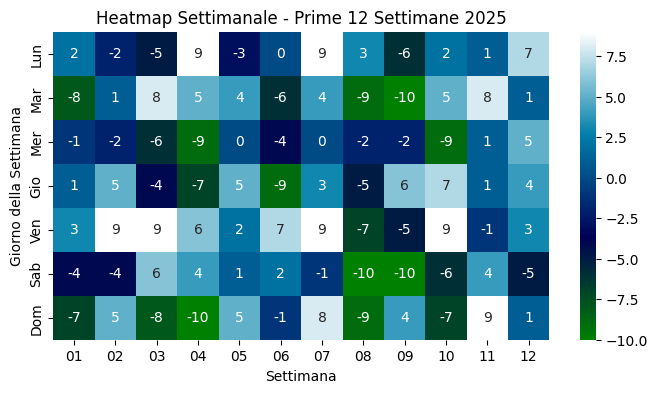

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

def crea_heatmap_settimanale(anno, numero_settimane):
    """
    Crea una heatmap settimanale con Seaborn.

    Args:
        anno: L'anno per cui generare la heatmap.
        numero_settimane: Il numero di settimane da includere nella heatmap (default: 10).
    """

    # Genera date per le prime 'numero_settimane' settimane dell'anno specificato
    date_inizio = pd.to_datetime(f'{anno}-01-01')  # Primo giorno dell'anno
    # Calcola il primo lunedì dell'anno
    while date_inizio.weekday() != 0:  # 0 = Lunedì
        date_inizio += pd.Timedelta(days=1)

    date_settimane = [date_inizio + pd.Timedelta(weeks=i) for i in range(numero_settimane)]

    # Prepara i dati per la heatmap
    settimane = []
    giorni_settimana = ['Lun', 'Mar', 'Mer', 'Gio', 'Ven', 'Sab', 'Dom']
    for settimana in date_settimane:
        for giorno in giorni_settimana:
            settimane.append({
                'Settimana': settimana.strftime('%W'),  # Numero della settimana
                'Giorno': giorno,
                'Valore': np.random.randint(-10, 10)  # Valore casuale
            })
    df = pd.DataFrame(settimane)

    # Pivot per creare la matrice per la heatmap
    df_pivot = df.pivot(index='Giorno', columns='Settimana', values='Valore')
    # Ordina i giorni della settimana
    df_pivot = df_pivot.reindex(giorni_settimana)

    # Crea la heatmap
    plt.figure(figsize=(8, 4))
    sns.heatmap(df_pivot, annot=True, cmap='ocean', fmt='d')  # cmap='viridis' per colori casuali
    plt.title(f'Heatmap Settimanale - Prime {numero_settimane} Settimane {anno}')
    plt.xlabel('Settimana')
    plt.ylabel('Giorno della Settimana')
    plt.show()

# Esempio di utilizzo:
crea_heatmap_settimanale(2025, 12)  # Heatmap per le prime x settimane del 2025

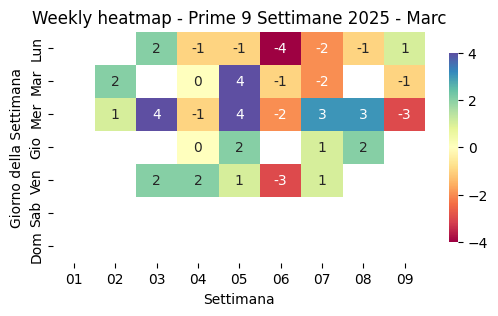

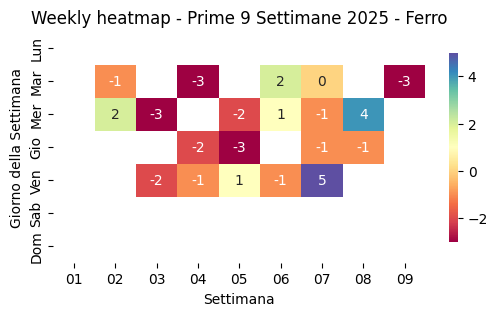

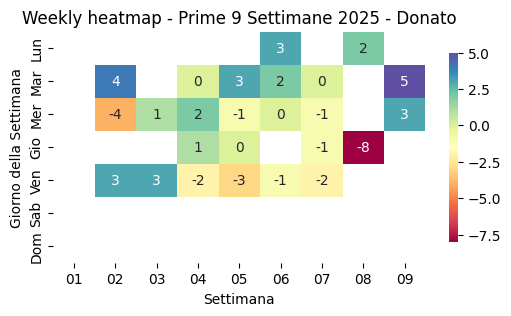

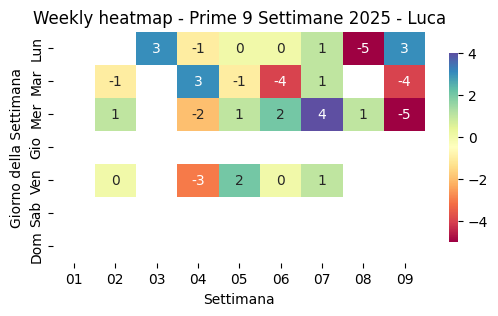

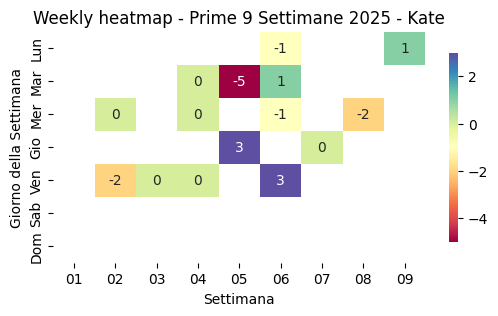

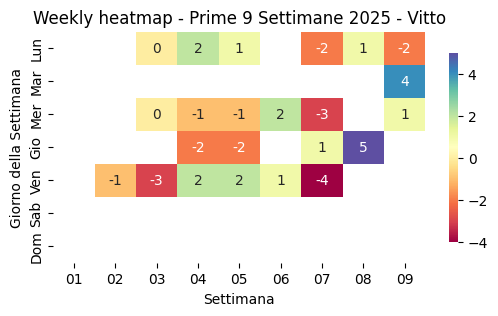

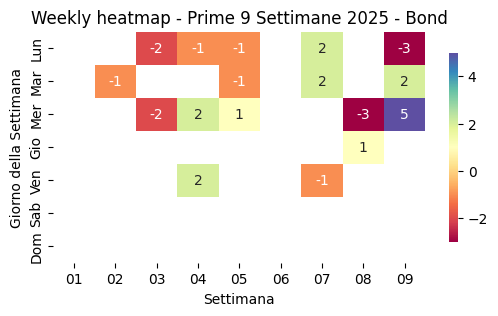

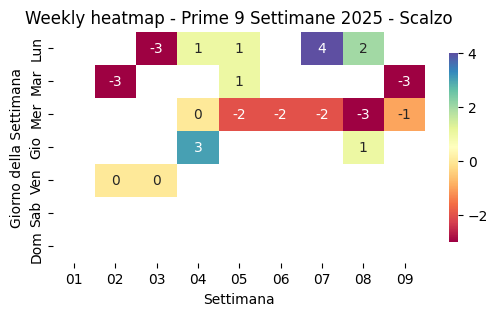

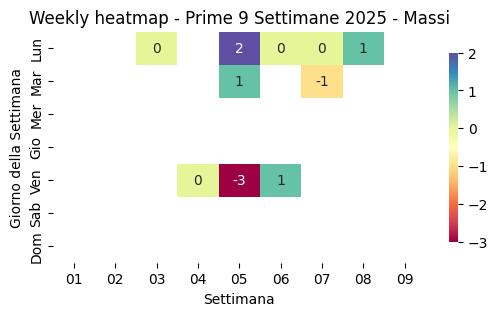

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

def genera_dizionario_partite(giornate_giocate, risultati, nome_giocatore):
    """
    Genera un dizionario con i risultati delle partite, includendo i giorni mancanti con 'nan'.
    Calcola tutte le giornate possibili all'interno della funzione.

    Args:
        giornate_giocate (list): Lista delle giornate in cui sono state giocate partite.
        risultati (list): Lista dei risultati ottenuti nelle giornate corrispondenti.
        nome_giocatore (str): Nome del giocatore.

    Returns:
        dict: Dizionario con i risultati del giocatore, inclusi i giorni mancanti.
    """

    # Calcola tutte le giornate possibili (esempio semplificato)
    # In uno scenario reale, dovresti avere un modo più robusto per generare le date
    mesi = ['gen', 'feb']
    giorni_per_mese = {'gen': 31, 'feb': 28}  # Assumiamo un anno non bisestile

    tutte_le_giornate = []
    for mese in mesi:
        for giorno in range(1, giorni_per_mese[mese] + 1):
            tutte_le_giornate.append(f'{giorno} {mese}')

    # Crea un dizionario temporaneo per mappare le giornate ai risultati
    risultati_mappati = dict(zip(giornate_giocate, risultati))

    # Crea la lista dei risultati completi
    risultati_completi = []
    for giornata in tutte_le_giornate:
        if giornata in risultati_mappati:
            risultati_completi.append(risultati_mappati[giornata])
        else:
            risultati_completi.append('nan')

    # Crea il dizionario finale
    dizionario_partite = {nome_giocatore: risultati_completi}

    return dizionario_partite

def crea_heatmap_settimanale(anno, numero_settimane, giornate_giocate, nome_giocatore):
    """
    Crea una heatmap settimanale con Seaborn, utilizzando i dati forniti.
    """
    risultati_giocatore = punteggi_giornalieri[nome_giocatore][0]
    # Genera date per le prime 'numero_settimane' settimane dell'anno specificato
    date_inizio = pd.to_datetime(f'{anno}-01-01')  # Primo giorno dell'anno

    # Calcola il giorno della settimana del 1° gennaio
    giorno_1_gennaio = date_inizio.weekday()  # 0 = Lunedì, 1 = Martedì, ..., 6 = Domenica

    # Calcola il primo lunedì dell'anno
    primo_lunedi = date_inizio - pd.Timedelta(days=giorno_1_gennaio)
    if giorno_1_gennaio > 0:
        primo_lunedi += pd.Timedelta(weeks=1)

    date_settimane = [primo_lunedi + pd.Timedelta(weeks=i) for i in range(numero_settimane)]

    # Genera i risultati completi utilizzando la funzione precedente
    nome = 'Giocatore X'
    risultati_completi = genera_dizionario_partite(giornate_giocate, risultati_giocatore, nome)[nome]

    # Prepara i dati per la heatmap
    settimane = []
    giorni_settimana = ['Lun', 'Mar', 'Mer', 'Gio', 'Ven', 'Sab', 'Dom']
    indice_risultato = -2
    for settimana in date_settimane:
        for giorno in giorni_settimana:
            data_corrente = settimana + pd.Timedelta(days=giorni_settimana.index(giorno))
            data_corrente_str = data_corrente.strftime('%d %b').lower()  # Formatta la data come '01 gen'
            valore = risultati_completi[indice_risultato] if indice_risultato < len(risultati_completi) else 'nan'
            settimane.append({
                'Settimana': settimana.strftime('%W'),  # Numero della settimana
                'Giorno': giorno,
                'Valore': valore
            })
            indice_risultato += 1
    df = pd.DataFrame(settimane)

    # Converti i valori 'nan' in numpy.nan per la heatmap
    df['Valore'] = pd.to_numeric(df['Valore'], errors='coerce')

    # Pivot per creare la matrice per la heatmap
    df_pivot = df.pivot(index='Giorno', columns='Settimana', values='Valore')
    # Ordina i giorni della settimana
    df_pivot = df_pivot.reindex(giorni_settimana)

    # Crea la heatmap
    plt.figure(figsize=(6, 3))
    sns.heatmap(df_pivot, annot=True, cmap='Spectral', fmt='.0f', cbar_kws={'shrink': .82}) # Mappe: Spectral, RdYlGn, magma, bwr_r, coolwarm_r
    plt.title(f'Weekly heatmap - Prime {numero_settimane} Settimane {anno} - {nome_giocatore}')
    plt.xlabel('Settimana')
    plt.ylabel('Giorno della Settimana')
    plt.show()

# Esempio di utilizzo:
#giornate = ['7 gen', '8 gen', '10 gen', '13 gen', '15 gen', '17 gen', '20 gen', '21 gen', '22 gen', '23 gen', '24 gen', '27 gen', '28 gen', '29 gen', '30 gen', '31 gen', '3 feb', '4 feb', '5 feb', '7 feb', '10 feb', '11 feb', '12 feb', '13 feb', '14 feb', '17 feb', '19 feb', '20 feb']
giornate = giorni
#
crea_heatmap_settimanale(2025, 9, giornate, 'Marc')
crea_heatmap_settimanale(2025, 9, giornate, 'Ferro')
crea_heatmap_settimanale(2025, 9, giornate, 'Donato')
crea_heatmap_settimanale(2025, 9, giornate, 'Luca')
crea_heatmap_settimanale(2025, 9, giornate, 'Kate')
crea_heatmap_settimanale(2025, 9, giornate, 'Vitto')
crea_heatmap_settimanale(2025, 9, giornate, 'Bond')
crea_heatmap_settimanale(2025, 9, giornate, 'Scalzo')
crea_heatmap_settimanale(2025, 9, giornate, 'Massi')